In [ ]:
# Here we just show that all lengths are identical and that both sentences have common and uncomon parts with the Target

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_excel('datasets/dataset1.xlsx')

# Display the first few rows of the dataset
print(df.head())

   Unnamed: 0                                Target  \
0           0     A man with a hard hat is dancing.   
1           1      A young child is riding a horse.   
2           2  A man is feeding a mouse to a snake.   
3           3        A woman is playing the guitar.   
4           4         A woman is playing the flute.   

                               sentence 1  \
0     A CAN WHET a GERARD hat is dancing.   
1       A young child is REDDING a horse.   
2  A man is feeding IO mouse to IO snake.   
3          A woman is playing the guitar.   
4          A WAYMAN WIZ SWAYING TU flute.   

                             sentence 2  
0     A man with a hard hat is dancing.  
1    A young TILED WIZ riding IO horse.  
2  A CAN is feeding a mouse to a snake.  
3       A WAYMAN WIZ SWAYING TU guitar.  
4         A woman is playing the flute.  


In [2]:
# Get summary statistics for the numerical columns
print(df.describe())


       Unnamed: 0
count  3006.00000
mean   1502.50000
std     867.90178
min       0.00000
25%     751.25000
50%    1502.50000
75%    2253.75000
max    3005.00000


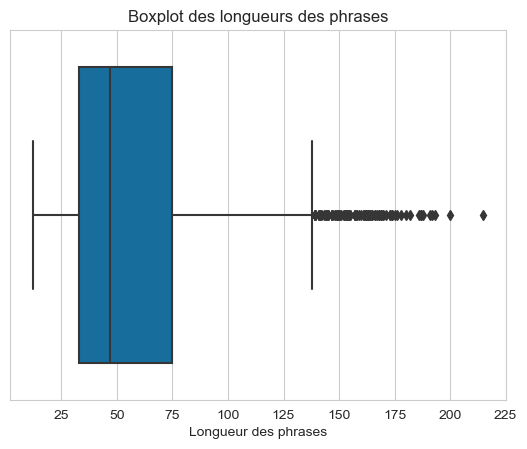

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_palette('colorblind')

ax = sns.boxplot(x=df['Target'].str.len(), data=df)
ax.set(xlabel='Longueur des phrases')
plt.title('Boxplot des longueurs des phrases')
plt.savefig('plots/plot1/lengths_boxplot.png')


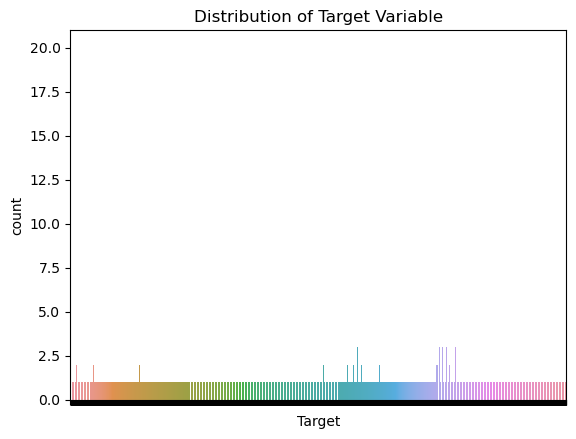

In [23]:
ax = sns.countplot(x='Target', data=df)
ax.set_xticklabels([])
plt.title('Distribution of Target Variable')
plt.savefig('plots/plot1/target_distribution.png')



In [24]:
# Plot the distribution of sentence lengths
df['sentence1_length'] = df['sentence 1'].str.len()
df['sentence2_length'] = df['sentence 2'].str.len()
df['target_length'] = df['Target'].str.len()



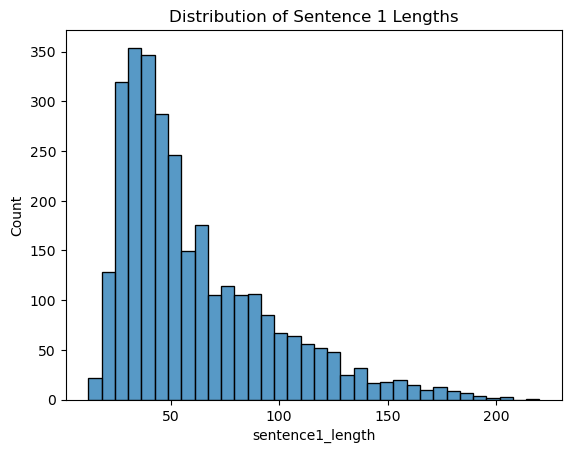

In [25]:

sns.histplot(data=df, x='sentence1_length')
plt.title('Distribution of Sentence 1 Lengths')
plt.savefig('plots/plot1/sentence1_length_distribution.png')



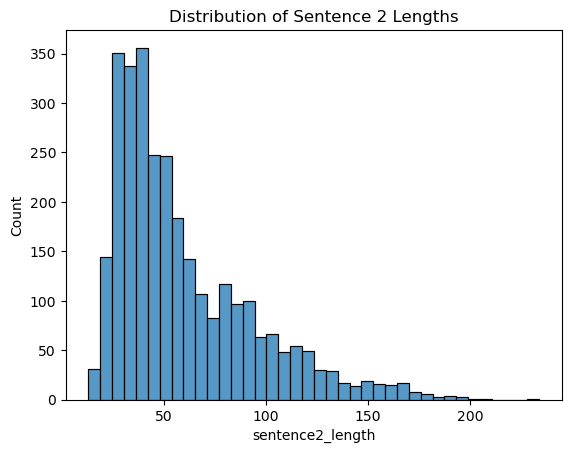

In [26]:
sns.histplot(data=df, x='sentence2_length')
plt.title('Distribution of Sentence 2 Lengths')
plt.savefig('plots/plot1/sentence2_length_distribution.png')



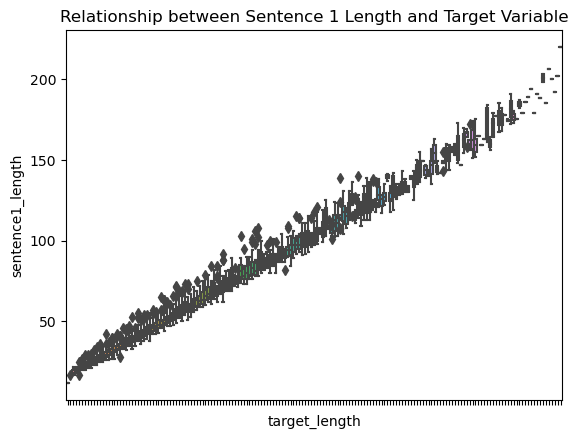

In [27]:
ax = sns.boxplot(x='target_length', y='sentence1_length', data=df)
ax.set_xticklabels([])
plt.title('Relationship between Sentence 1 Length and Target Variable')
plt.savefig('plots/plot1/sentence1_length_target_relationship.png')


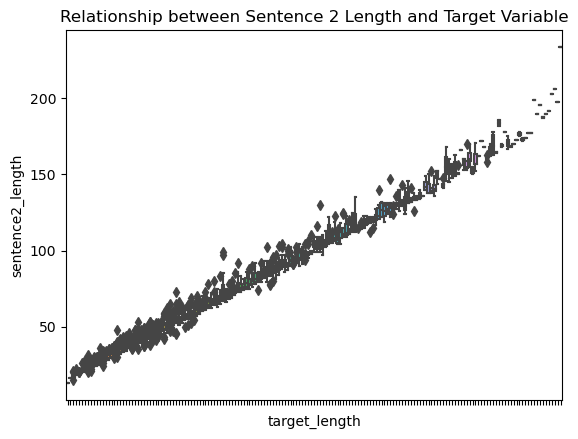

In [28]:
ax = sns.boxplot(x='target_length', y='sentence2_length', data=df)
ax.set_xticklabels([])
plt.title('Relationship between Sentence 2 Length and Target Variable')
plt.savefig('plots/plot1/sentence2_length_target_relationship.png')


In [29]:
from collections import Counter

In [35]:
def get_word_counts(col1, col2):
    # Split the sentences into words and convert to lowercase
    words1 = df[col1].str.lower().str.split()
    words2 = df[col2].str.lower().str.split()

    # Flatten the lists of words and count the occurrences of each word
    word_counts1 = Counter(word for words in words1 for word in words)
    word_counts2 = Counter(word for words in words2 for word in words)

    # Get the common and uncommon words and their counts
    common_words = word_counts1 & word_counts2
    uncommon_words = (word_counts1 | word_counts2) - common_words

    # Sum up the counts of common and uncommon words
    common_word_count = sum(common_words.values())
    uncommon_word_count = sum(uncommon_words.values())

    return common_word_count, uncommon_word_count

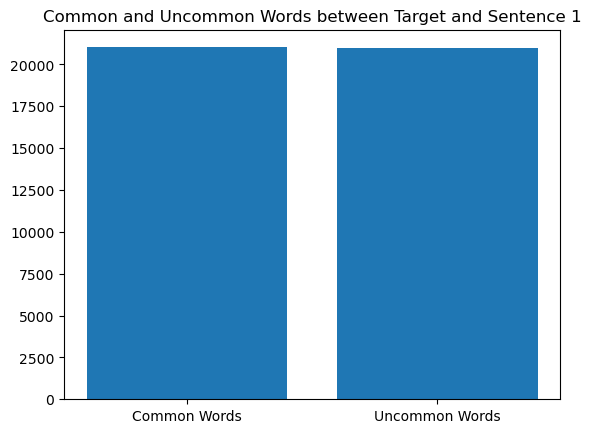

In [36]:
# Get the counts of common and uncommon words between the Target and sentence 1 columns
common_word_count1, uncommon_word_count1 = get_word_counts('Target', 'sentence 1')

# Plot the counts of common and uncommon words
plt.bar(['Common Words', 'Uncommon Words'], [common_word_count1, uncommon_word_count1])
plt.title('Common and Uncommon Words between Target and Sentence 1')
plt.savefig('plots/plot1/common_uncommon_words_target_sentence1.png')

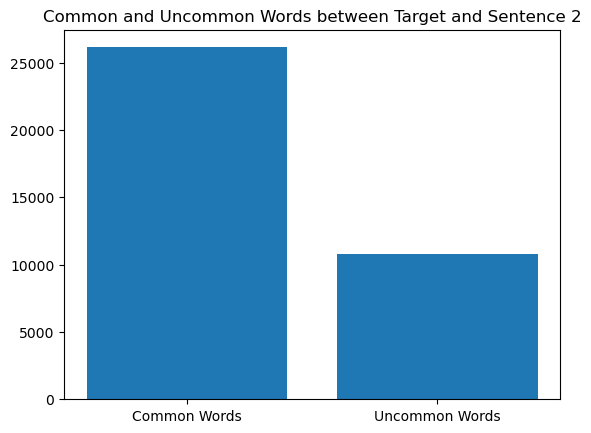

In [37]:
# Get the counts of common and uncommon words between the Target and sentence 2 columns
common_word_count2, uncommon_word_count2 = get_word_counts('Target', 'sentence 2')

# Plot the counts of common and uncommon words
plt.bar(['Common Words', 'Uncommon Words'], [common_word_count2, uncommon_word_count2])
plt.title('Common and Uncommon Words between Target and Sentence 2')
plt.savefig('plots/plot1/common_uncommon_words_target_sentence2.png')